In [40]:
import json

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-white')  # 'seaborn-ticks'
sns.set_style('white')
import dateutil

In [41]:
animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='FBG|RBG').columns
fbg_cols = data.filter(regex='FBG').columns
rbg_cols = data.filter(regex='RBG').columns
pval_cols = data.filter(regex='pval').columns

n = data.filter(regex='1091|1093')                 # normal
i = data.filter(regex='1060|1062|1074|1092|1102')  # impaired
d = data.filter(regex='1076|1082|1101')            # diabetic

f = data[fbg_cols]  # fasted
r = data[rbg_cols]  # random-fed

fn = n.filter(fbg_cols)  # fasted normal 
fi = i.filter(fbg_cols)  # fasted impaired
fd = d.filter(fbg_cols)  # fasted diabetic

rn = n.filter(rbg_cols)  # random normal
ri = i.filter(rbg_cols)  # random impaired
rd = d.filter(rbg_cols)  # random diabetic

order_cols = rn.columns.to_list() + fn.columns.to_list() + \
                ri.columns.to_list() + fi.columns.to_list() + \
                rd.columns.to_list() + fd.columns.to_list()

qval_sampling = data['fdr corrected pval effect of sampling']
qval_gtol = data['fdr corrected pval effect of glucose tolerance']
qval_cross = data['fdr corrected pval effect of interaction sampling and glucose tolerance']

In [42]:
# colors
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)
    
with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
    class_map = json.load(infile)

In [53]:
lm_pal = sns.color_palette('Set2', n_colors=2)
# lm_colormap = pd.Series({x: (lm_pal[0] if x[0] == 'l' else lm_pal[1]) for x in d.columns})
display(lm_pal)

display(sns.color_palette('colorblind', 15))
blindcolor = sns.color_palette('colorblind', 15)
rbg_color = blindcolor[0]
fbg_color = blindcolor[1]
normal_color = blindcolor[2]
impaired_color = blindcolor[7]
diabetic_color = blindcolor[4]

with open(r'..\data\metadata\metab_lipid_class_superclass_color.json', 'r') as infile:
    class_colormap = json.load(infile)

lm_class = data[['Compound Class']]
lm_class.loc[:, 'd'] = lm_class['Compound Class'].map(class_colormap)
lm_class.loc[:, 'color'] = lm_class['d'].str[0]
lm_class.loc[:, 'superclass'] = lm_class['d'].str[1]
lm_class.drop(['d', 'Compound Class'], inplace=True, axis=1)
data = data.join(lm_class)
data[['color', 'superclass']]


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

C:\Users\bjanderson23\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\bjanderson23\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ValueError: columns overlap but no suffix specified: Index(['color', 'superclass'], dtype='object')

In [54]:
class_map

{'TG': [[0.5803921568627451, 0.403921568627451, 0.7411764705882353],
  'Glycerolipid'],
 'Alkenyl-DG': [[0.5803921568627451, 0.403921568627451, 0.7411764705882353],
  'Glycerolipid'],
 'AC': [[0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
  'Fatty Acyl'],
 'FA': [[0.8392156862745098, 0.15294117647058825, 0.1568627450980392],
  'Fatty Acyl'],
 'CE': [[0.12156862745098039, 0.4666666666666667, 0.7058823529411765],
  'Sterol Lipid'],
 'SM': [[1.0, 0.4980392156862745, 0.054901960784313725], 'Sphingolipid'],
 'Cer[NS]': [[1.0, 0.4980392156862745, 0.054901960784313725], 'Sphingolipid'],
 'LysoPE': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'LysoPC': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'PC': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'PI': [[0.17254901960784313, 0.6274509803921569, 0.17254901960784313],
  'Phospholipid'],
 'Plasmenyl-PC': [[0.1725

In [57]:
data['superclass'] = data['Compound Class'].map(class_map).str[1]
data['superclass'].unique()

array(['Unidentified', 'Phospholipid', 'Fatty Acyl', 'Glycerolipid',
       'Sphingolipid', 'Sterol Lipid', 'Other Metabolite',
       'Amine/Amide/Ammonium/N-heterocycle', 'Amino Acid',
       'Carboxylic Acid'], dtype=object)

In [50]:
k = data[data['Compound Class'] != 'unknown']
k.loc[(k['Type'] == 'metabolite') & \
      (~k['superclass'].isin(['Sphingolipid', 'Fatty Acyl'])), 'superclass'].value_counts()

Amino Acid                            30
Amine/Amide/Ammonium/N-heterocycle    17
Other Metabolite                      14
Carboxylic Acid                       13
Name: superclass, dtype: int64

In [51]:
# lsc = Lipid SuperClass
lsc_counts = k.loc[(k['Type'] == 'lipid') | (k['Compound Class'] == 'FA'), 'superclass'].value_counts()
lsc_names = lsc_counts.index
print(lsc_names)
print(lsc_counts, '\n\n')

msc_counts = k.loc[(k['Type'] == 'metabolite') & \
                   (~k['superclass'].isin(['Sphingolipid', 'Fatty Acyl'])), 'superclass'].value_counts()
msc_names = msc_counts.index
print(msc_counts, msc_names)

Index(['Phospholipid', 'Glycerolipid', 'Sphingolipid', 'Fatty Acyl',
       'Sterol Lipid'],
      dtype='object')
Phospholipid    163
Glycerolipid    107
Sphingolipid     30
Fatty Acyl       18
Sterol Lipid      4
Name: superclass, dtype: int64 


Amino Acid                            30
Amine/Amide/Ammonium/N-heterocycle    17
Other Metabolite                      14
Carboxylic Acid                       13
Name: superclass, dtype: int64 Index(['Amino Acid', 'Amine/Amide/Ammonium/N-heterocycle', 'Other Metabolite',
       'Carboxylic Acid'],
      dtype='object')


Wedge(center=(0, 0), r=1, theta1=0, theta2=182.236, width=0.5)
Wedge(center=(0, 0), r=1, theta1=182.236, theta2=301.863, width=0.5)
Wedge(center=(0, 0), r=1, theta1=301.863, theta2=335.404, width=0.5)
Wedge(center=(0, 0), r=1, theta1=335.404, theta2=355.528, width=0.5)
Wedge(center=(0, 0), r=1, theta1=355.528, theta2=360, width=0.5)


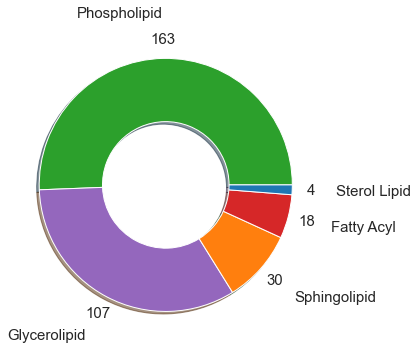

In [62]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = lsc_names
sizes = lsc_counts.to_list()
explode = (0, 0, 0, 0, 0) 
total = sum(sizes)

fig, ax = plt.subplots()
wedges = ax.pie(
    sizes, 
   labels=labels, 
   explode=explode, 
   autopct=lambda p: '{:.0f}'.format(p * total / 100),
   shadow=True, 
   startangle=0,
   wedgeprops={'width': 0.5},
   textprops={'fontsize': 15}, 
   labeldistance=1.35,
   pctdistance=1.15)

for wedge, name_text, number_text in zip(wedges[0], wedges[1], wedges[2]):
    print(wedge)
    m_class = name_text.get_text()
    wedge.set_facecolor(colors[m_class])

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches((5,5))

plt.savefig(r'..\reports\figures\4-2-2\lipid_id_piechart.svg')

Wedge(center=(0, 0), r=1, theta1=0, theta2=145.946, width=0.5)
Wedge(center=(0, 0), r=1, theta1=145.946, theta2=228.649, width=0.5)
Wedge(center=(0, 0), r=1, theta1=228.649, theta2=296.757, width=0.5)
Wedge(center=(0, 0), r=1, theta1=296.757, theta2=360, width=0.5)


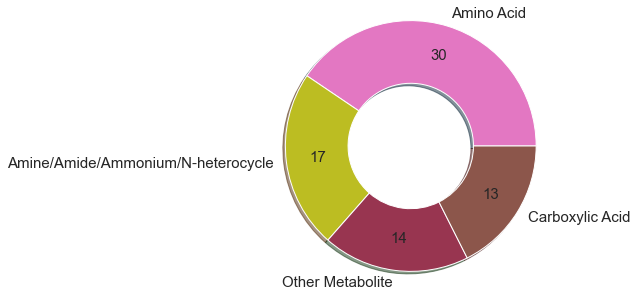

In [63]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = msc_names
sizes = msc_counts.to_list()
explode = (0, 0, 0, 0, 0) 
total = sum(sizes)

colors['Amine/Amide/Ammonium/N-heterocycle'] = colors['Amine']

fig, ax = plt.subplots()
wedges = ax.pie(
    sizes, 
   labels=labels, 
#        explode=explode, 
   autopct=lambda p: '{:.0f}'.format(p * total / 100),
   shadow=True, 
   startangle=0,
   wedgeprops={'width': 0.5},
   textprops={'fontsize': 15}, 
   labeldistance=1.1,
   pctdistance=0.75)

for wedge, name_text, number_text in zip(wedges[0], wedges[1], wedges[2]):
    print(wedge)
    m_class = name_text.get_text()
    wedge.set_facecolor(colors[m_class])
    
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches((5,5))

plt.savefig(r'..\reports\figures\4-2-2\metab_id_piechart.svg')